<a href="https://colab.research.google.com/github/Ram060299/Heart-Sound-Processing-via-xLSTM/blob/main/HS_Preprocess_data_whole_folder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
# The mount point needs to be a path on the system, not a URL
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

# prompt: i want run whole folder

%cd /content/drive/My Drive/HS Cleared Audio
!ls
!bash run.sh  # Replace 'run.sh' with the actual script name if needed

/content/drive/My Drive/HS Cleared Audio
2_H21_N_CAP_T1.wav  H22N_CTA2T.wav  H23NT-HS.wav	    HS_PE4_MO_M_21_2_3.wav  M22N_CAP6TF.wav
H22N_CAP1T.wav	    H22N_CTA7T.wav  HS2_A_F_22.wav	    HS_P_M_22.wav	    M22N_CAP6T.wav
H22N_CAP3P.wav	    H23N_CAP3T.wav  HS2_M_F_22.wav	    M22N_CAP1TF.wav	    M22N_CAP7M.wav
H22N_CAP3T.wav	    H23NCAPL1.wav   HS2_P_F_22.wav	    M22N_CAP1T.wav	    M22N_CAP8T.wav
H22N_CAP4A.wav	    H23NCAPM7.wav   HS2_T_F_22.wav	    M22N_CAP3P.wav	    M22N_CPA11P.wav
H22N_CAP5_A.wav     H23NCAPP1.wav   HS3_A_F_22.wav	    M22N_CAP3T.wav	    M22N_CPA14T.wav
H22N_CAP5A.wav	    H23NCAPP7.wav   HS3_T_F_22.wav	    M22N_CAP4T.wav
H22N_CAP5M.wav	    H23NCAPT1.wav   HS_PE3_MO_M_21_2_3.wav  M22N_CAP5TF.wav
H22N_CAP9T.wav	    H23NP-HS.wav    HS_PE3_MO_M_22_2_1.wav  M22N_CAP5T.wav
bash: run.sh: No such file or directory


In [7]:
import librosa
import soundfile as sf
import os

# Load and convert audio to a uniform format and sampling rate
audio_dir = '/content/drive/My Drive/HS Cleared Audio' # Changed to audio_dir as this is a directory

for filename in os.listdir(audio_dir): # Loop through all files in directory
  if filename.endswith('.wav'): # Only load .wav files, you can adjust file types as needed
    audio_path = os.path.join(audio_dir, filename) # Create full path to audio file
    y, sr = librosa.load(audio_path, sr=16000)  # Convert to 16kHz
    sf.write(audio_path, y, sr) # Overwrite original file with converted audio



In [10]:

import librosa.effects

# Remove leading and trailing silence
y_trimmed, _ = librosa.effects.trim(y)

# Save the trimmed audio
# Added filename.wav to the directory path
sf.write('/content/drive/My Drive/HS Cleared Audio/filename.wav', y_trimmed, sr)


In [11]:
# Identify and handle corrupted or incomplete files
# Example: Check if audio files can be loaded properly
try:
    y, sr = librosa.load('/content/drive/My Drive/HS Cleared Audio/filename.wav')
except Exception as e:
    print(f"Error loading file: {e}")
    # Handle the missing or corrupted file


In [12]:
import numpy as np

# Detect and remove outliers based on amplitude
threshold = np.mean(np.abs(y)) + 3 * np.std(np.abs(y))
y_no_outliers = y[np.abs(y) < threshold]

# Save the cleaned audio
sf.write('/content/drive/My Drive/HS Cleared Audio/filename.wav', y_no_outliers, sr)



In [13]:
# Convert stereo to mono
y_mono = librosa.to_mono(y)

# Save the mono audio
sf.write('/content/drive/My Drive/HS Cleared Audio/filename.wav', y_mono, sr)



In [14]:
!pip install --upgrade librosa

import librosa.util

# Ensure all clips are of the same duration
max_duration = 10.0  # seconds
y_fixed_length = librosa.util.fix_length(y, size=int(sr * max_duration)) # Use size parameter to specify desired length
# Save the consistent-length audio
sf.write('/content/drive/My Drive/HS Cleared Audio/filename.wav', y_fixed_length, sr)



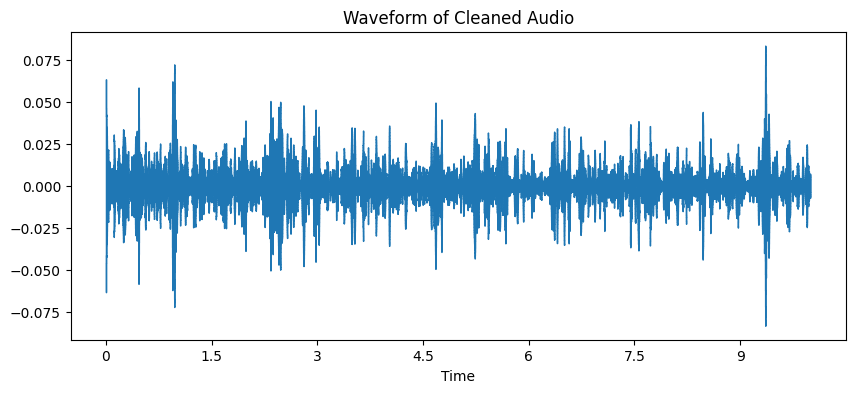

In [18]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt

# Load and convert audio to a uniform format and sampling rate
audio_path = '/content/drive/My Drive/HS Cleared Audio/filename.wav'
y, sr = librosa.load(audio_path, sr=16000)  # Convert to 16kHz
sf.write('/content/drive/My Drive/HS Cleared Audio.wav' ,y, sr)

# Assuming y is your audio data that you want to display
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)  # Use 'y' instead of 'y_fixed_length'
plt.title('Waveform of Cleaned Audio')
plt.show()



In [19]:
# Install required libraries
!pip install librosa

import librosa
import os
import numpy as np

# Set the folder path where your audio files are stored
folder_path ='/content/drive/My Drive/HS Cleared Audio'  # Update this to your folder path

# List to store all audio data and their corresponding sample rates
all_audio_data = []
all_sample_rates = []

# Loop through all audio files in the folder and load them
audio_filenames = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

for audio_file in audio_filenames:
    file_path = os.path.join(folder_path, audio_file)
    y, sr = librosa.load(file_path, sr=None)  # Load the audio file with original sample rate
    all_audio_data.append(y)  # Store audio data
    all_sample_rates.append(sr)  # Store the sample rate

# Example: Convert all audios to a common sample rate (e.g., 16kHz) and concatenate them into a single array
target_sr = 16000
all_preprocessed_audio = []

for i, audio_data in enumerate(all_audio_data):
    # Resample audio to the target sample rate
    y_resampled = librosa.resample(audio_data, orig_sr=all_sample_rates[i], target_sr=target_sr)
    all_preprocessed_audio.append(y_resampled)

# Concatenate all preprocessed audios into one large array
combined_audio = np.concatenate(all_preprocessed_audio)

# combined_audio is the entire batch of audios preprocessed as one dataset
print(f"Combined audio shape: {combined_audio.shape}")


Combined audio shape: (13579294,)


In [20]:
import librosa
import numpy as np

# Feature extraction function
def extract_features(y, sr):
    # Example features you can extract
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # MFCCs
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)  # Mel-spectrogram
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)  # Chroma features

    # Aggregate all features into a single feature array (flatten for simplicity)
    features = np.concatenate([mfccs.flatten(), mel_spec.flatten(), chroma.flatten()])
    return features

# Extract features from the combined audio
target_sr = 16000  # Make sure sample rate is consistent
features_combined_audio = extract_features(combined_audio, sr=target_sr)

# Features shape
print(f"Extracted features shape: {features_combined_audio.shape}")

# Optional: Normalizing/Scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_combined_audio.reshape(-1, 1))  # Scaling

# Reshaping back to 1D array after scaling
scaled_features = scaled_features.flatten()

# Saving the processed features to a file for future use
np.save('processed_audio_features.npy', scaled_features)
print("Saved scaled features to processed_audio_features.npy")


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Extracted features shape: (4058019,)
Saved scaled features to processed_audio_features.npy


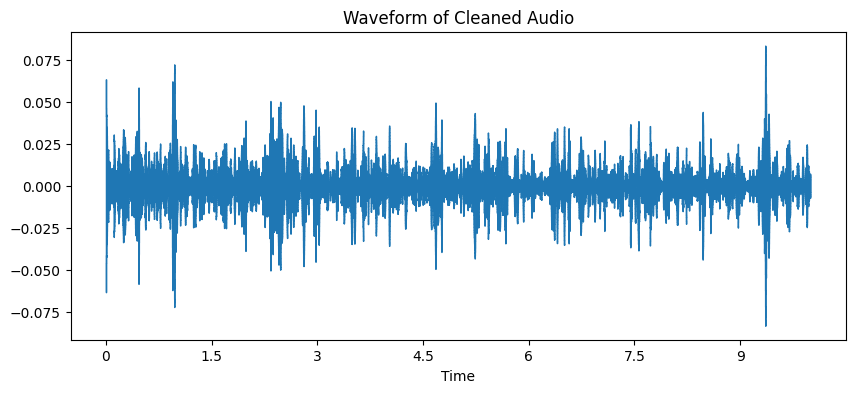

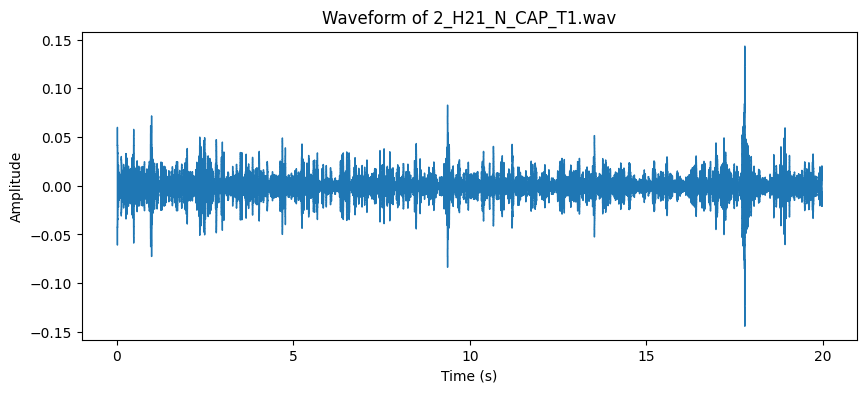

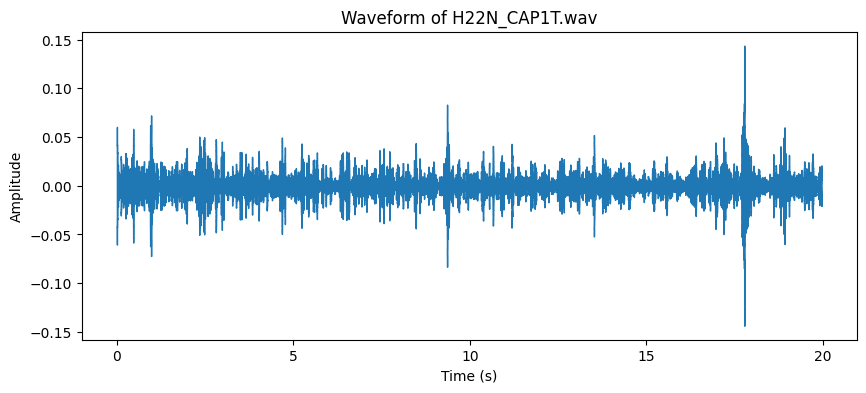

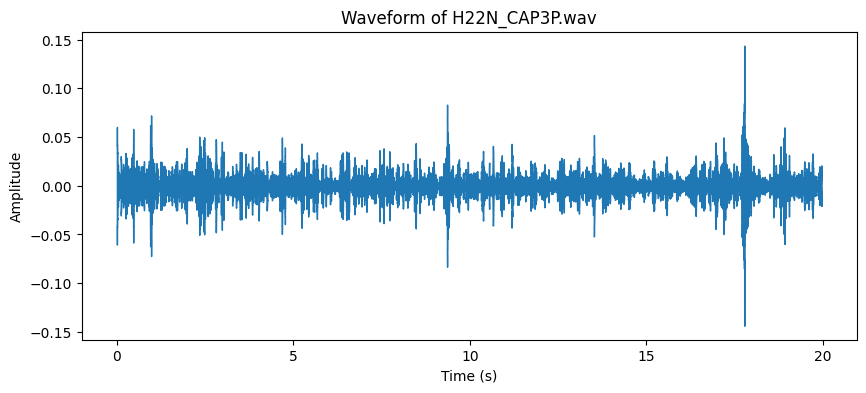

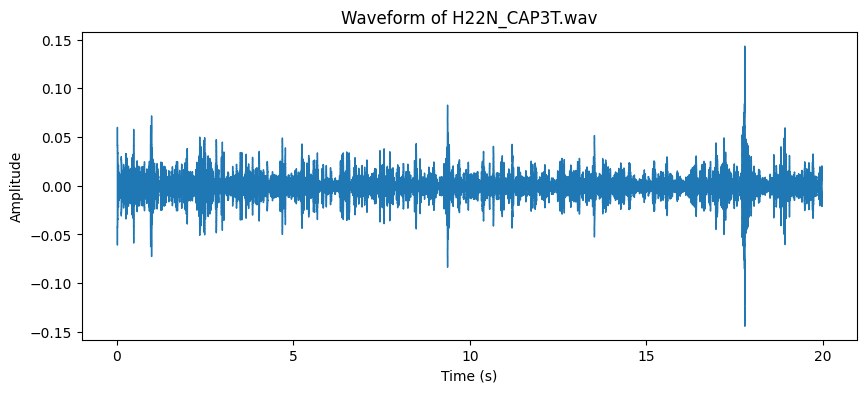

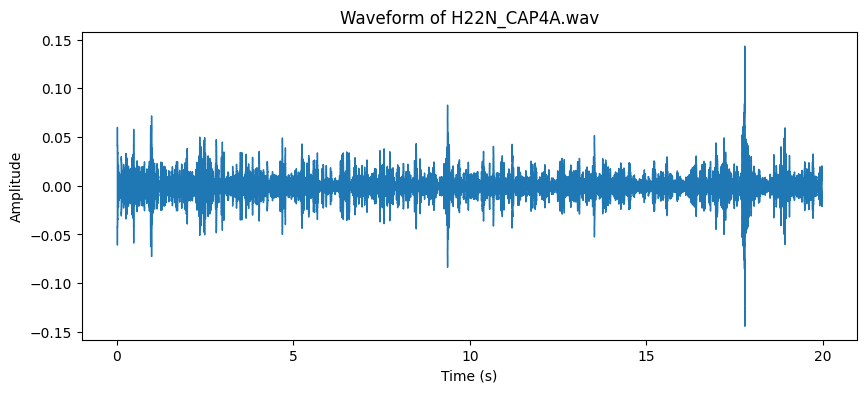

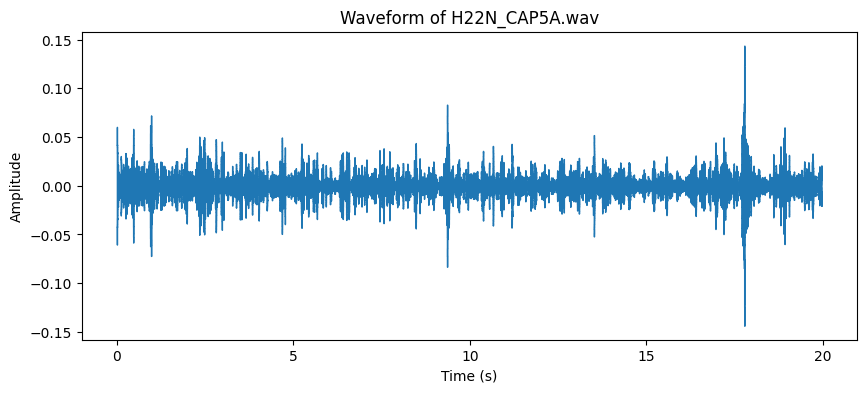

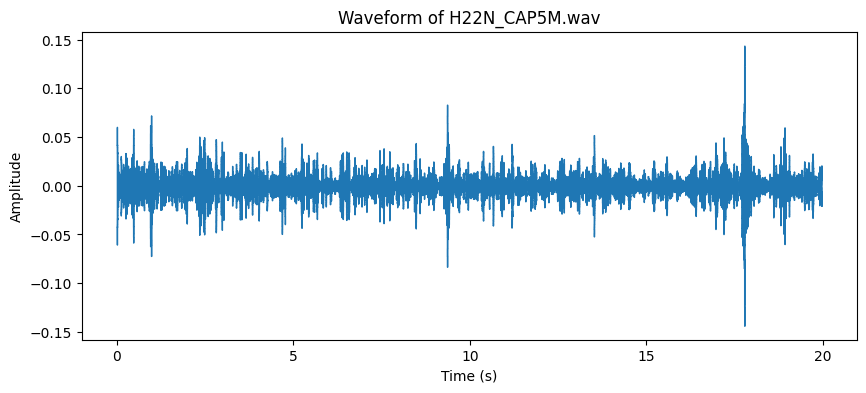

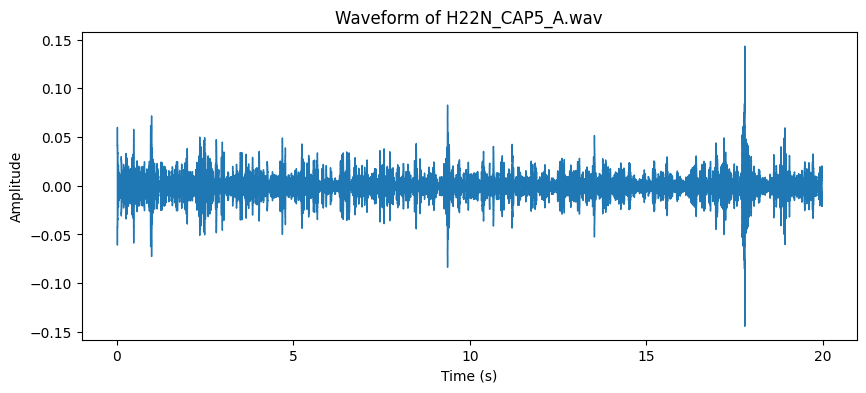

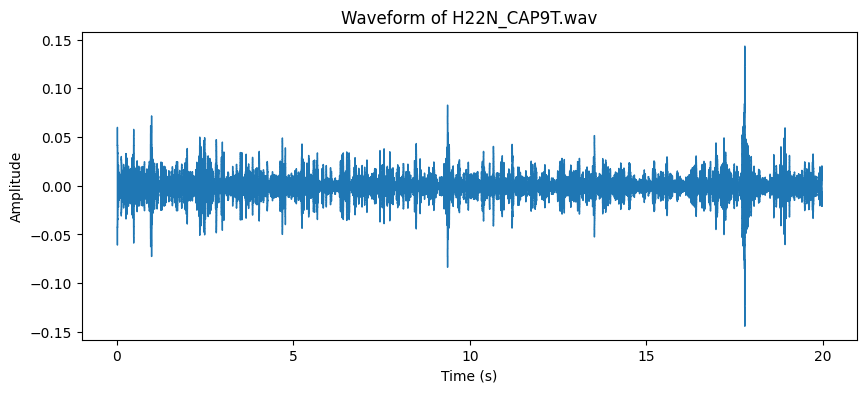

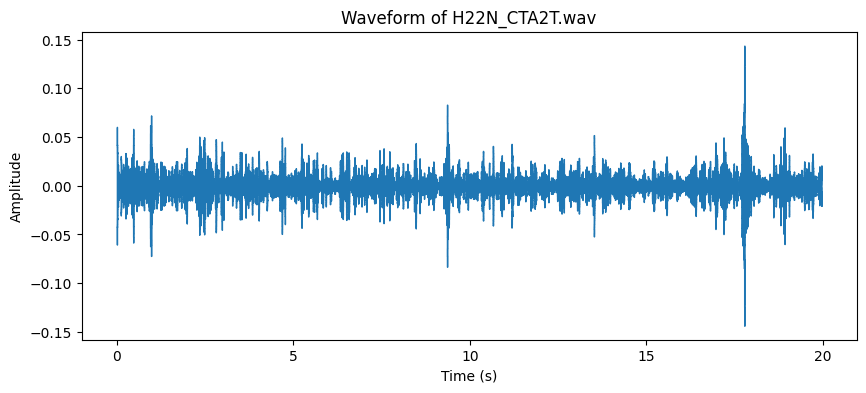

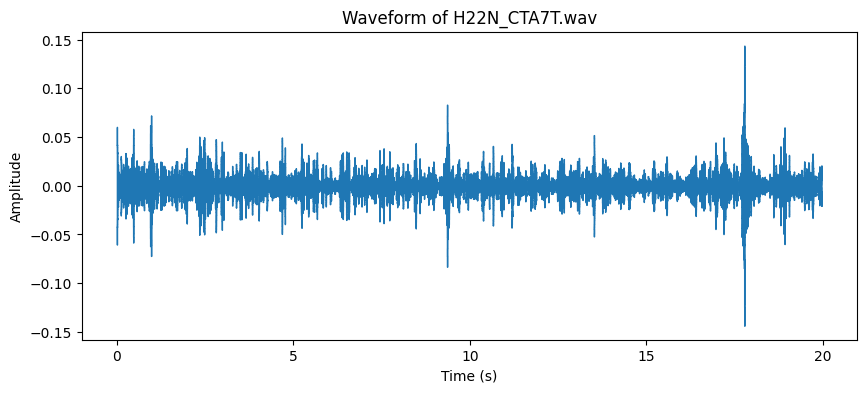

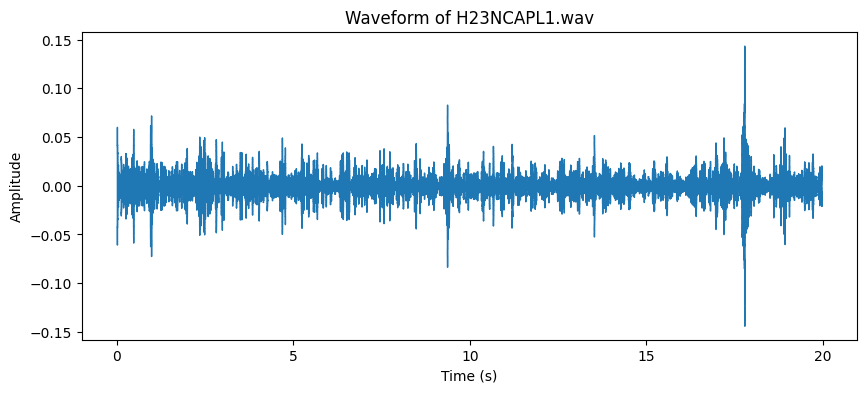

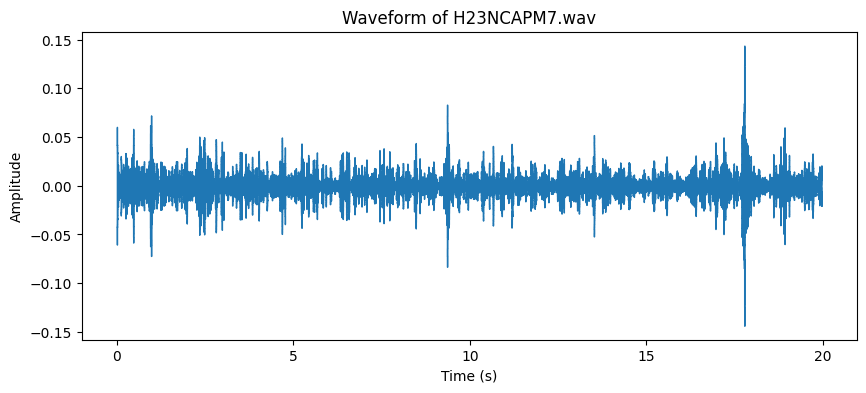

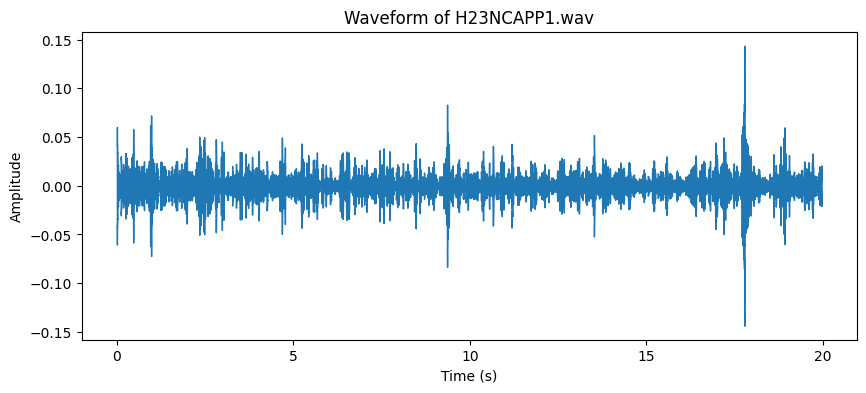

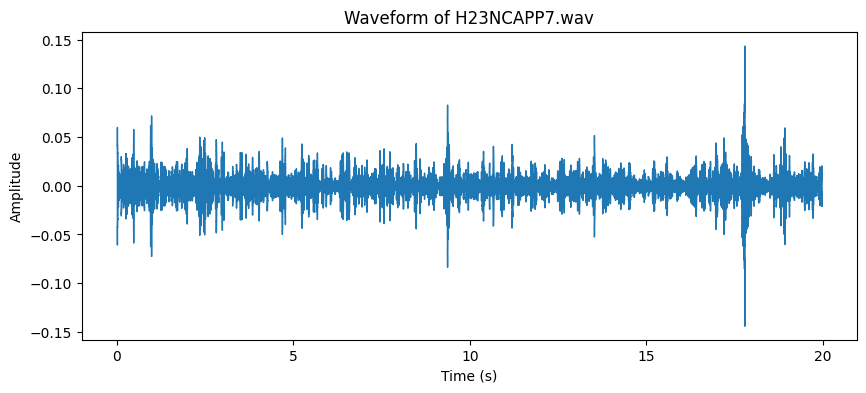

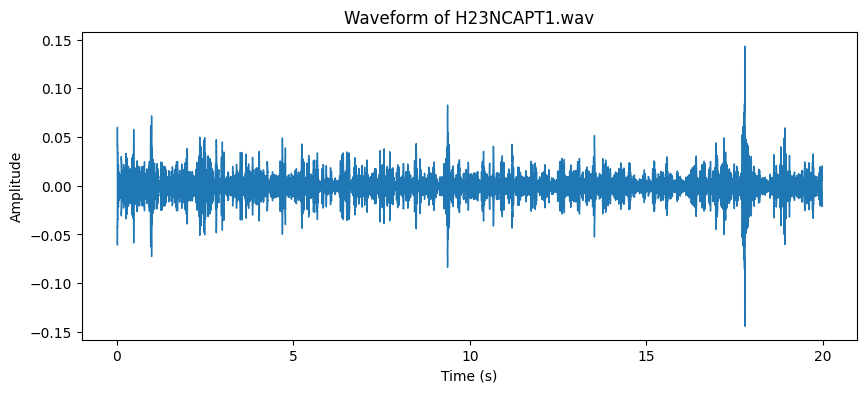

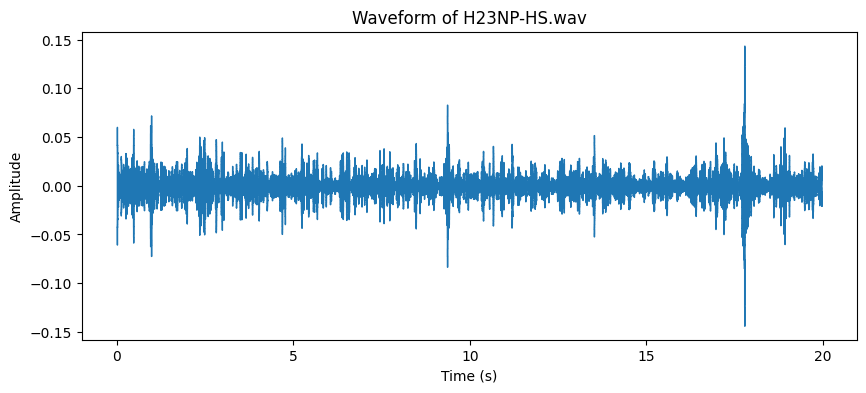

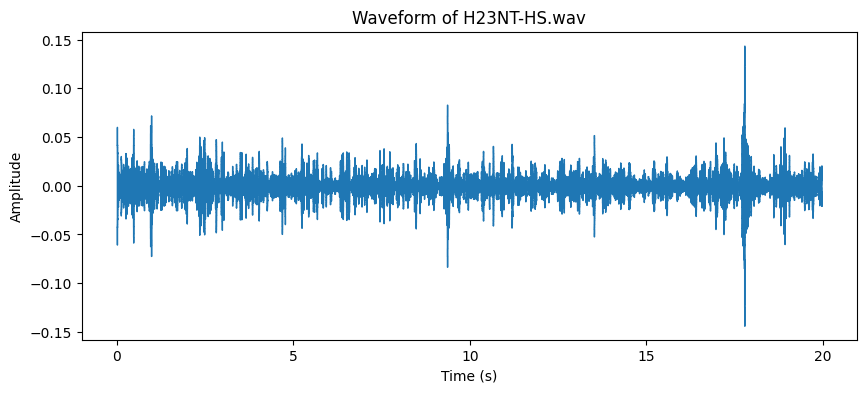

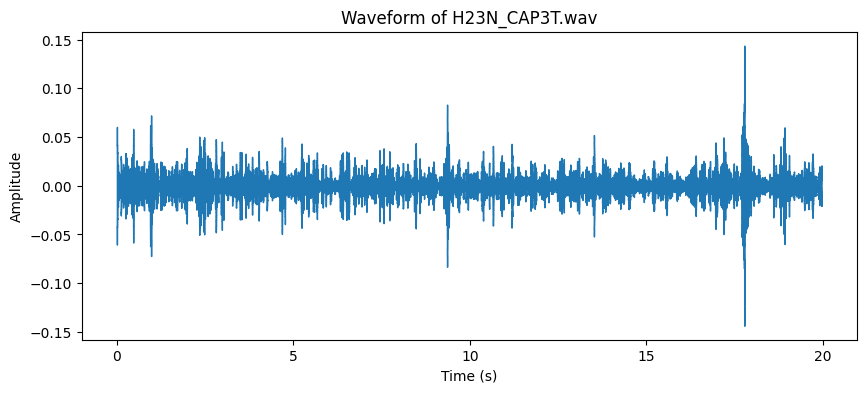

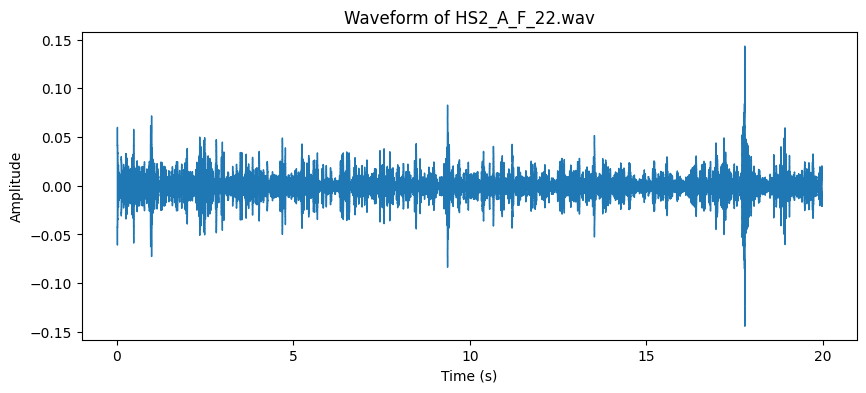

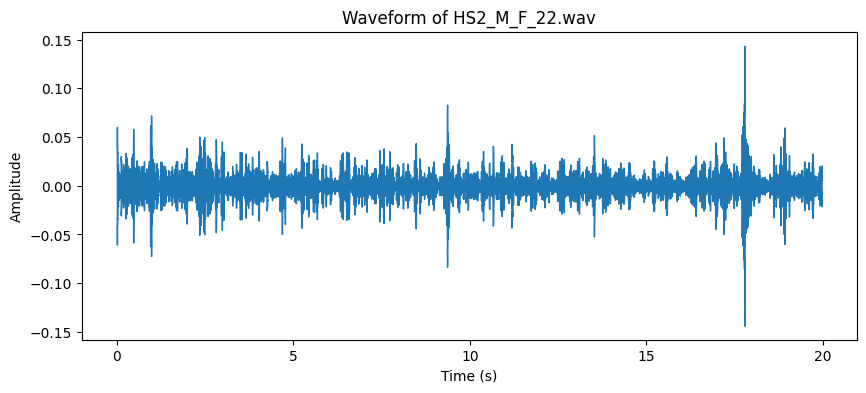

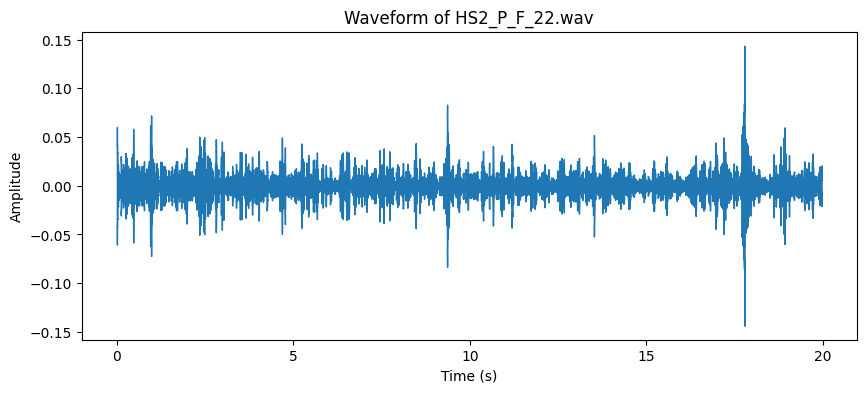

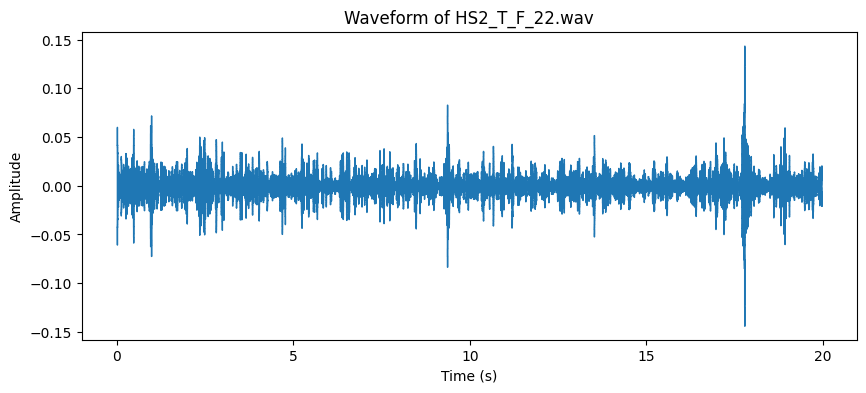

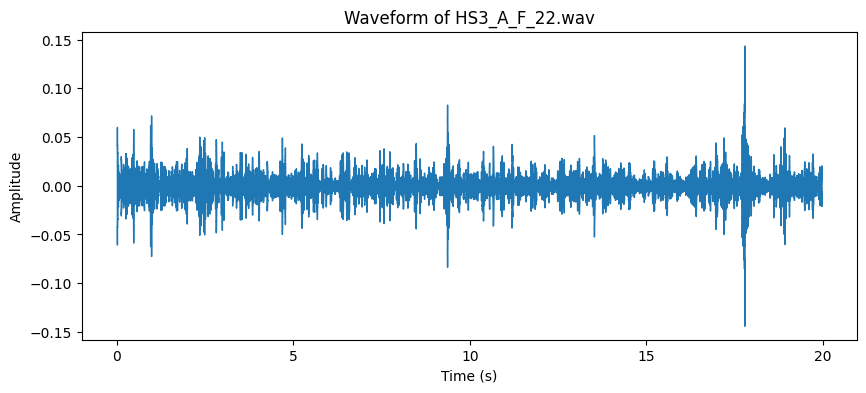

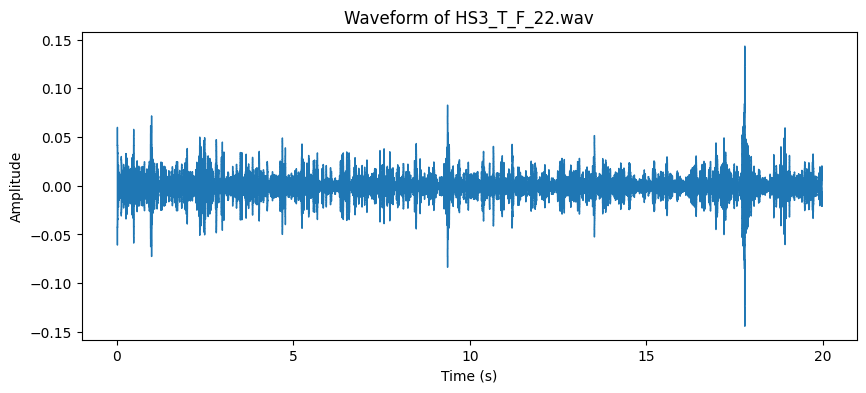

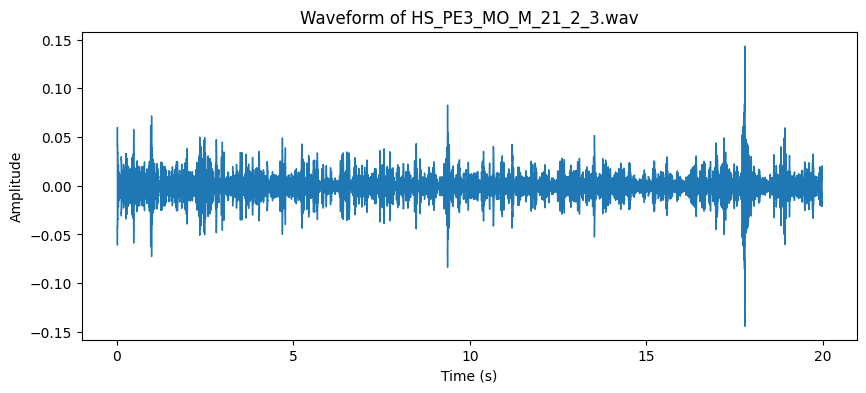

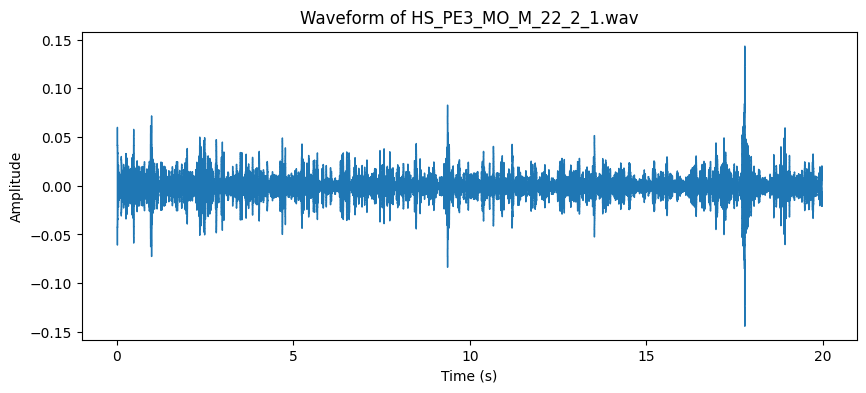

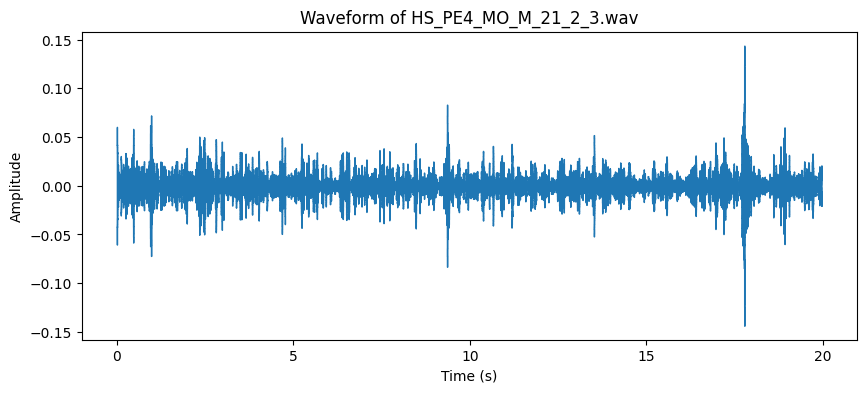

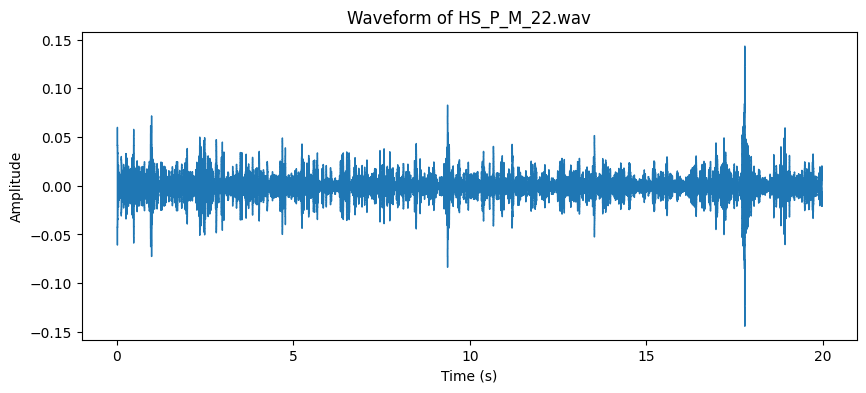

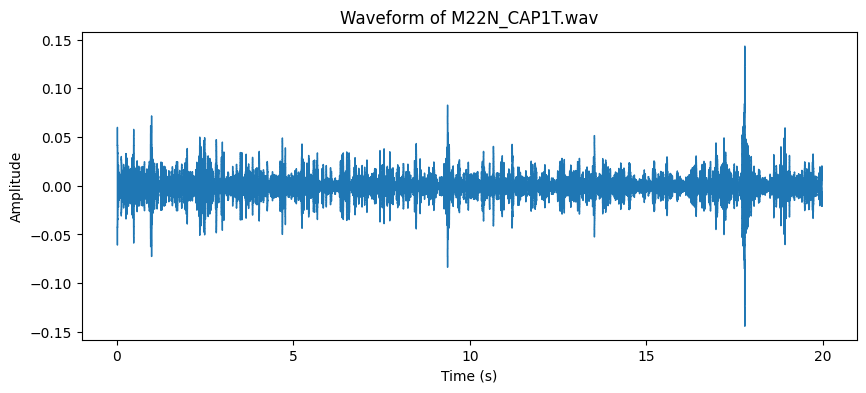

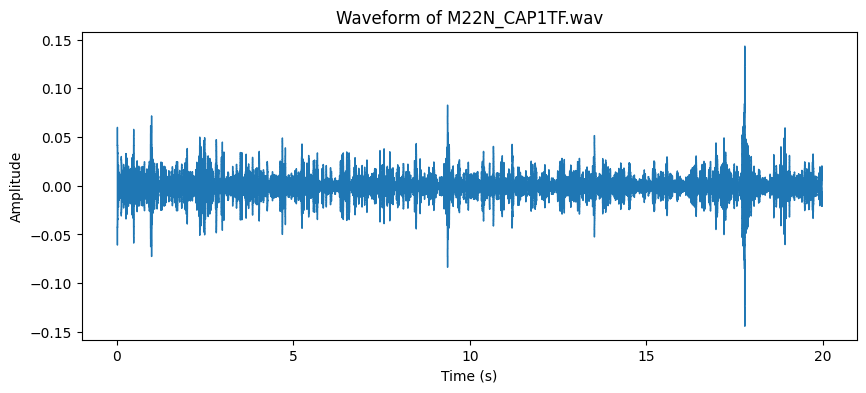

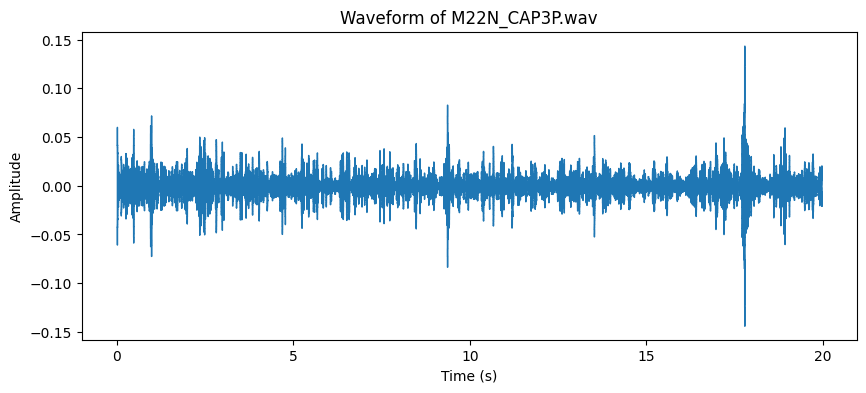

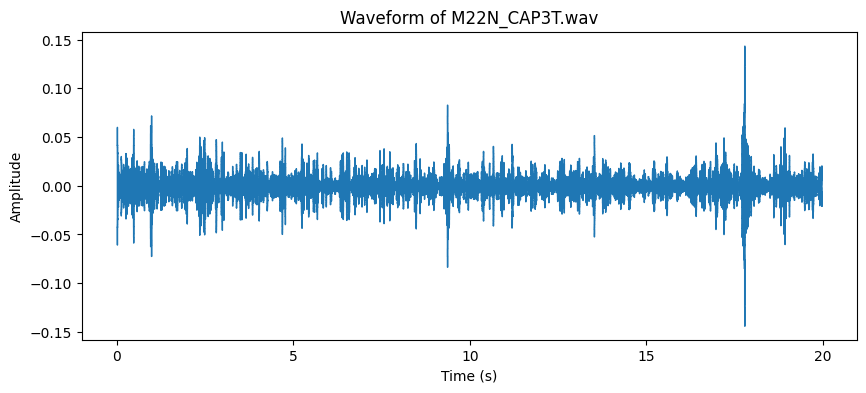

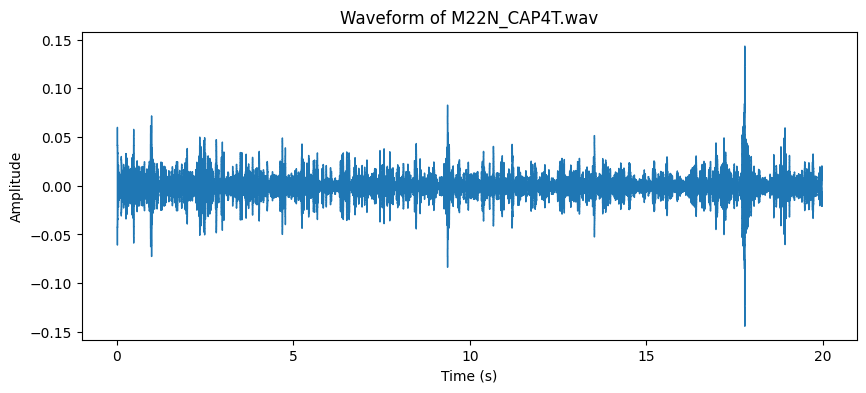

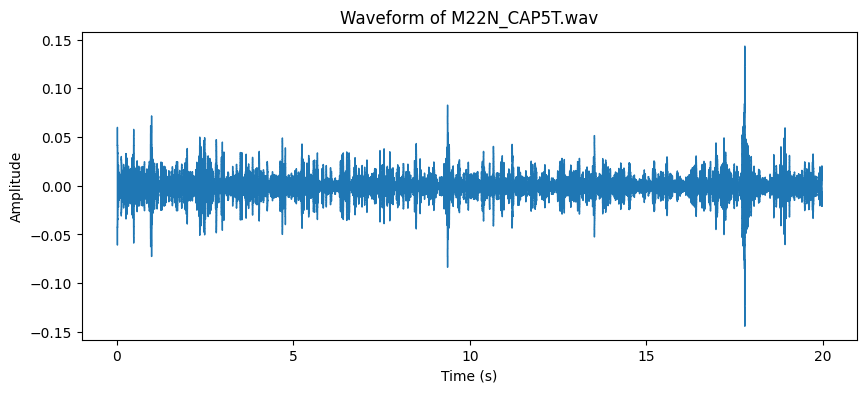

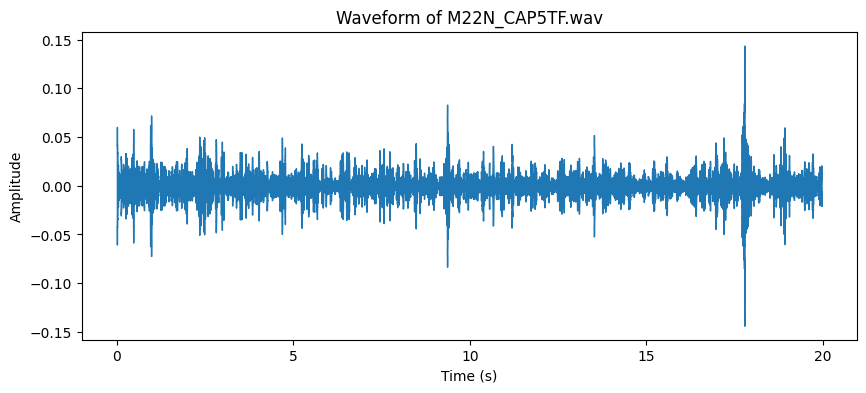

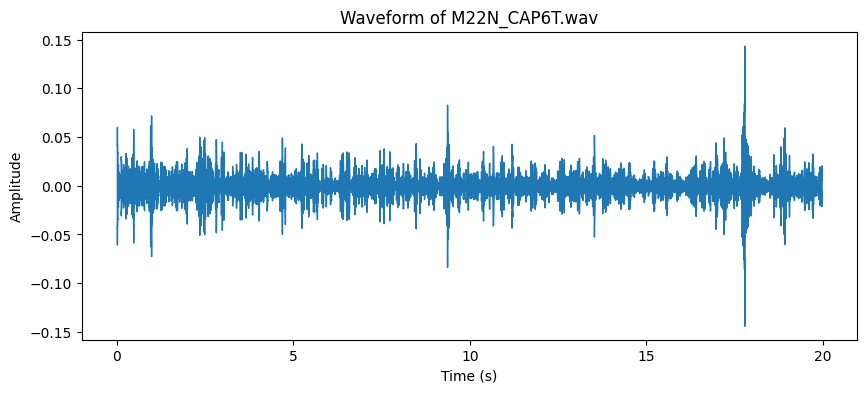

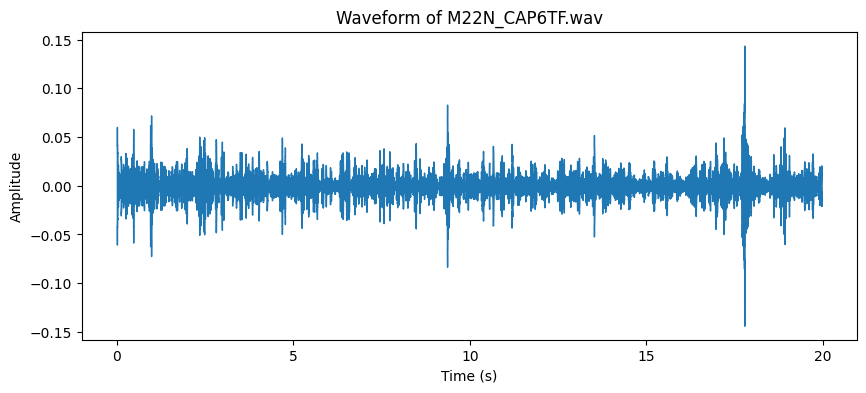

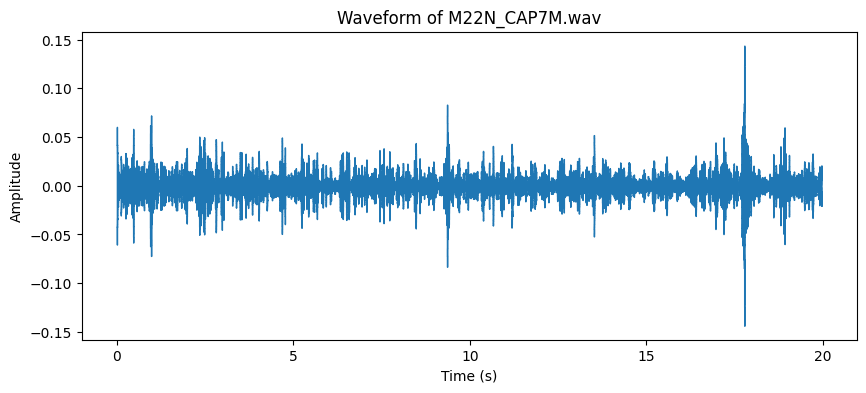

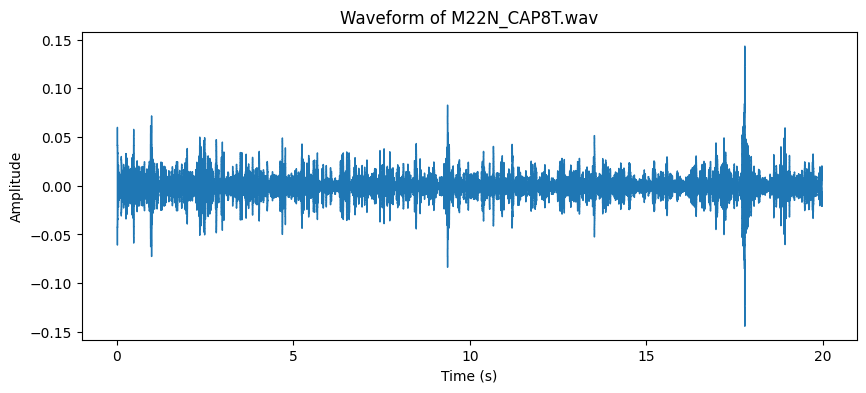

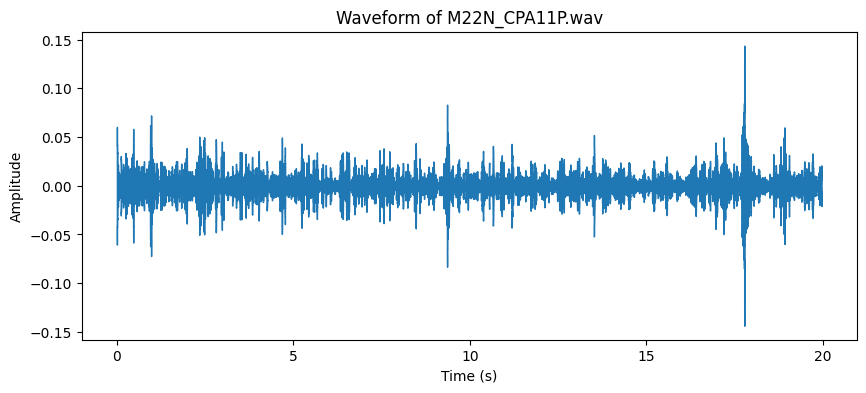

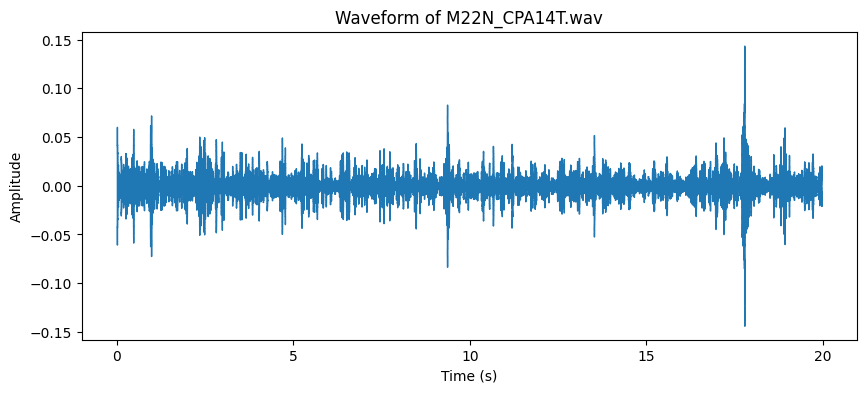

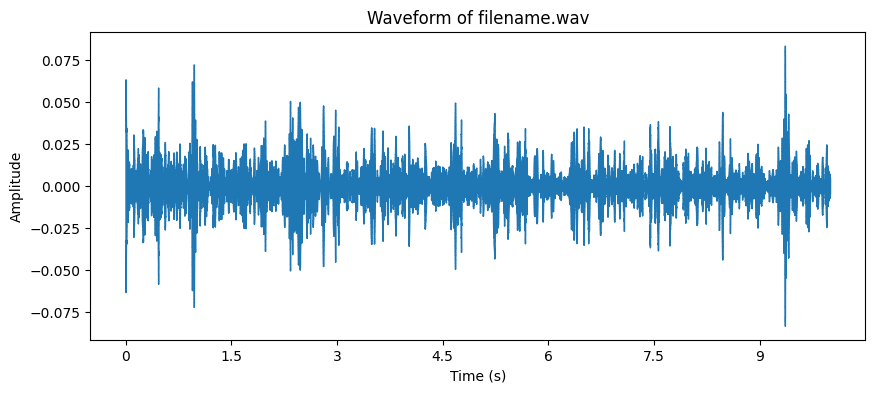

Processed 43 audio files.


In [23]:
# Install required libraries
!pip install librosa matplotlib

import librosa
import os
import matplotlib.pyplot as plt

# Set the folder path where your audio files are stored
folder_path = '/content/drive/My Drive/HS Cleared Audio'  # Update this to your folder path

# List to store all audio data
all_audio_data = []

# Loop through all audio files in the folder and load them
audio_filenames = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

# Function to plot the waveform of an audio file
def plot_waveform(audio_data, sr, title):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio_data, sr=sr)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

for audio_file in audio_filenames:
    file_path = os.path.join(folder_path, audio_file)
    y, sr = librosa.load(file_path, sr=None)  # Load the audio file with original sample rate
    all_audio_data.append(y)

    # Plot the waveform for the current audio file
    plot_waveform(y, sr, title=f"Waveform of {audio_file}")

print(f"Processed {len(audio_filenames)} audio files.")
